# **<u>Kinetyka chemiczna</u>: reakcja Braya-Liebhafsky'ego**

****
## **Spis treści**
1. Wstęp
    1. Cel projektu, wprowadzenie do kinetyki ogólnie, dlaczego B-L itd - potem wymyslę lepsze tytuly 
    2. Historia
2. Podstawy teoretyczne - tu opis zjawiska, potrzebne definicje, model równania, który wybraliśmy
3. Matematyka - rozwiązanie (analityczne??), rachunki numeryczne (-> Agenda), może porównanie z jakimś kokretnym eksperymentem jak się uda znaleźć <br>
    **Agenda:**
    1. Opis układu równań 
    1. sprowadzenie do układu dwóch równań
    1. implementacja metody Gaussa 
    1. implementacja metody Runge-Kutta 
    1. porównanie obu wyników dla obu metod 
4. Podsumowanie i wnioski
5. Bibliografia
***

***
## **1. Wstęp**

### 1.1 Cel projektu, wprowadzenie do kinetyki ogólnie, dlaczego B-L itd - potem wymyslę lepsze tytuly 

Kinetyka chemiczna to dział chemii, konkretnie chemii fizycznej, badający przebieg reakcji chemicznych. Różni się jednak od termodynamiki podejściem do problemu: termodynamika pozwala przewidzieć kierunek zachodzenia reakcji czy określić jej wydajność i bilans energetyczny, ale nie zapewnia informacji o samym procesie. Kinetyka natomiast skupia się na szybkości reakcji i zmianach stężeń związków chemicznych, co pozwala zrozumieć mechanizm przebiegu reakcji i określić wpływ czynników takich jak np.: temperatura czy obecność katalizatorów na kierunek i tempo reakcji [[5](#ref5)].

Możliwość badania mechanizmu reakcji jest szczególnie przydatna w przypadku zajmowania się reakcjami, w których występują oscylacje stężeń. Są one ciekawym typem przemian chemicznych, ponieważ w większości zjawisk stężenia substancji biorących udział w przemianie dążą do określonego stanu równowagi i pozostają w nim, dopóki nie wpłyniemy na reakcję, np.: dodając więcej któregoś ze związków. Mimo to, w szczególnych warunkach, mogą zachodzić reakcje, w których stężenia długo oscylują wokół stanu równowagi, zanim się w nim zatrzymają. Czasami takie wahania można zaobserwować gołym okiem, przykładowo po zmianie koloru badanego roztworu - tak jak w reakcji Biełausowa-Żabotyńskiego. W innych przypadkach zmiany wizualne są zbyt subtelne i należy badać ilość substancji w odpowiednich przedziałach czasowych [[6](#ref6)]. Określając zmiany stężeń w jednostkach czasu używamy metod kinetyki chemicznej.

### 1.2 Historia

Historycznie uważano, że oscylacje nie mają prawa występować w reakcjach chemicznych, a ich obserwacje wynikają z 

***
## **2. Podstawy teoretyczne**

Definicje, podstawy dla ludzi, którzy nie wiedzą co to kwas podjodawy itd

***
## **3. Matematyka**

### 3.1 Metody numeryczne
Metody numeryczne używamy kiedy rozwiązanie analityczne jest trudne lub niemożliwe do uzyskania. Wtedy przybliżamy rozwiązanie korzystając z algorytmów przybliżających wartości funkcji w danym punkcie. W tym projekcie przedstawimy metodę 
Eulera oraz metodę Rungego-Kutty czwartego rzędu (RK4).

#### Błędy obcięcia
Błąd lokalny to wielkość odchylenia w pojedyńczym kroku,
Błąd globalny to wielkość odchylenia w końcowym momencie. 

### 3.1a Metoda Eulera [[2](#ref2)]
Jedną z najprostrzych metod numerycznych jest metoda eulera, która przybliża pochodną funkcji za pomocą różnic skończonych, jest to metoda pierwszego rzędu, tzn. błąd globalny jest rzędu $O(n)$. Zakładamy że zmiana w krótkim okresie czasu (h) jest liniowa

Weźmy pewne równanie różniczkowe:

$ \frac{dy}{dt}= f(y, t)$

Następnie możemy przybliżyć wartość w punkcie $ t_{0} + h $ korzystając z operatora różnic skończonych, weźmy początkową wartość $ y_{0}, t_{0}$:

$ y'(t_{0} + h) = \frac{y(t_{0} + h) - y_{0}}{h} + R = f(t_{0}+h,y)$, gdzie $ R $ to reszta którą pomijamy. Stąd otrzymujemy:

$y(t_{0} + h) = y_{0} + hf(t_{0},y_{0})$

Rekurencyjnie:

$ y_{n + 1} = y_{n} + hf(t_{n}, y_{n}) $ 

dodaj skąd reszta znika i implementacje  w python 


In [ ]:
def euler_method(f, t0, y0, h, steps, k):
    """
    f: funkcja przyjmująca argumenty t, C 
    t0: wartość początkowa argumentu t
    y0: wartość początkowa funkcji y
    h: wielkość kroku
    steps: ilość kroków
    k: parametr modelu 
    """
    t_values = [t0]
    y_values = [C0]
    for _ in range(steps):
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1], k)
        t_values.append(t_next)
        y_values.append(C_next)
    return np.array(t_values), np.array(y_values)

### 3.1b Metoda Runge-Kutty (RK4)[[3](#ref3)]
Jest to bardziej zaawansowana metoda. Wykorzystuje 4 kroki obliczeń w każdym kroku czasowym, zapewnia wysoką precyzję i stabilność. Liczymy w niej określoną ilość kroków pośrednich $ f(t_{*}, y_{*})$ dla $ t_{n} \leq t_{*} \leq  t_{n+1} $ oraz korzystamy z rozwinięcia funkcji w szereg taylora. 

Wyznaczmy 4 kroki pośrednie: 
$k_{1} = hf(x_n, y_n)$

$k_{2} = hf(x_{n} + \frac{1}{2}h, y_{n} + \frac{1}{2}k_1)$

$k_{3} = hf(x_n + \frac{1}{2}h, y_{n} + \frac{1}{2}k_2)$

$k_{4} = hf(x_{n} + h, y_{n} + k_{3})$

Końcowo otrzymujemy wzór na kolejną wartość:
$y_{n+1} = y_n + \frac{1}{6}h \left( k_1 + 2k_2 + 2k_3 + k_4 \right)$,

poniżej przedstawiam implementację w języku python

In [ ]:
def rk4_method(f, t0, C0, h, steps, k):
    t_values = [t0]
    C_values = [C0]
    for _ in range(steps):
        t_next = t_values[-1] + h
        k1 = h * f(t_values[-1], C_values[-1], k)
        k2 = h * f(t_values[-1] + h / 2, C_values[-1] + k1 / 2, k)
        k3 = h * f(t_values[-1] + h / 2, C_values[-1] + k2 / 2, k)
        k4 = h * f(t_values[-1] + h, C_values[-1] + k3, k)
        C_next = C_values[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t_values.append(t_next)
        C_values.append(C_next)
    return np.array(t_values), np.array(C_values)

### 3.1c Metoda Runge-Kutty (RK45) [[4](#ref7)]
W językach różnych językach programowania (m.in. Python, Matlab) bardzo często stosuje się metody RK45 do rozwiązywania równań rożniczkowych. Jest to standardowa metoda dla funkcji solve_ivp, ode_int. Jest to połączenie metody Runge-Kutty 4 rzędu którą opisałem powyżej oraz metody 5 rzędu, korzystają one  tych samych wartosci posrednich [7],  oraz dzięki temu są w stanie oszacować błąd lokalny (wartość funkcji 5 rzędu - wartość funkcji 4 rzędu). Dlaczego to jest ważne? Dzięki szacowaniu błędu jesteśmy w stanie stwierdzic czy krok który przyjeliśmy jest odpowiedni, tzn. że nie popełniamy dużego błędu. Jeśli nie jest python zmieni go automatycznie tak aby błąd był akceptowalny. (**dodaj wiecej przypisow, do tego artykulu**). Jest to bardzo wydajna technika ponieważ gdy funkcja jest niemalże stała, to możemy pozwolić sobie na większy rok i dopiero gdy trafimy na obszary dużej zmienności zmniejszamy krok. **opisz w latexie to jeszcze**

### **Rozwiązanie modelu reakcji Bray'a - Liebhafskiego czterech zmiennych** 

Skorzystamy z wbudowanej metody Runge-Kutty w funkcję solve_ivp. Warto zauważyć, że czas $t$ oraz stężenia $U,V,Z,W$ są bezwymiarowe ze względu na dobór parametrów $R_{1},...$, zgodnie z [[1](#ref1)]. Wykorzystane poniżej metody numeryczne można stosować wyłącznie w przypadkach nie-szytywnych równań różniczkowych. Rozwiązując sztywne równanie różniczkowe konieczne byłoby istotne zmniejszenie kroku, do takiego stopnia, że obliczenia mogłby być nieefektywne. 

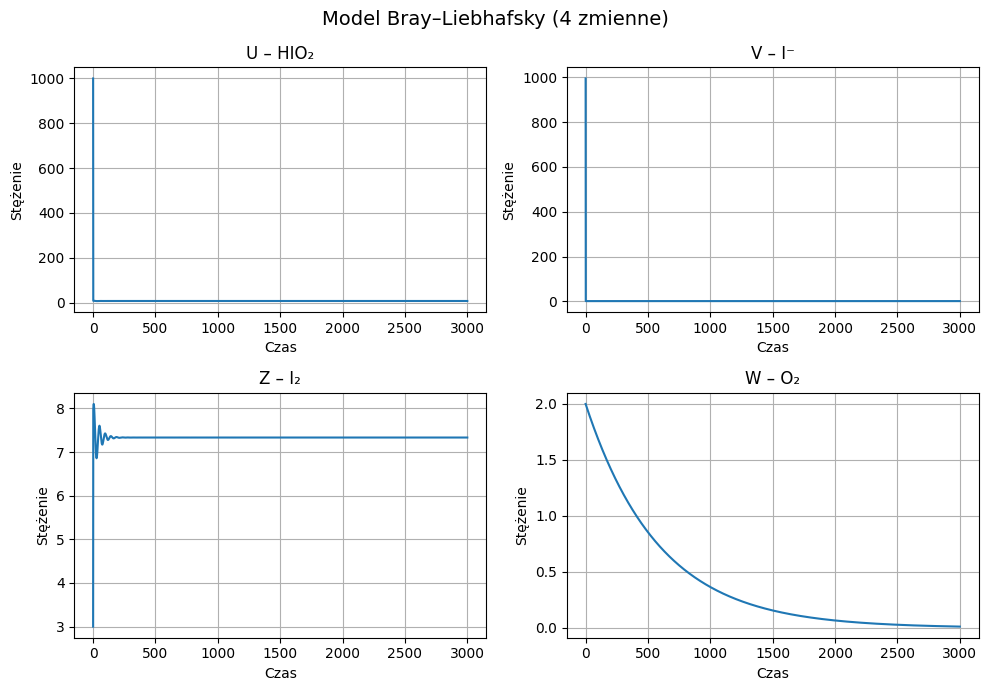

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# NIE WIEM CZY PARAMETRY R SĄ ODPOWANIE
def bray_liebhafsky_model(t, y, R1, R2, R3, R4, R5, R6, R7):
    """Model różniczkowy reakcji Braya-Liebhafsky'ego
    :param t: czas ustawiany przez solver
    :param y: wartości początkowe a później wektory stanu
     U0: stężenie początkowe Kwasu jodowego III HIO₂
     V0: st. począt. Anionu jodkowego I⁻
     Z0: st. począt. Jodu cząsteczkowego I₂
     W0: st. począt. tlenu cząsteczkowego 0₂
    :param R1:= k₁ah²T
    :param R2:= k₂hMT (=1)
    :param R3:= k₃p³T
    :param R4:= k₄TM
    :param R5:= k₅cT (=1)
    :param R6:= k₆T
    :param R7:= k₇T
     a: stężenie IO₃⁻ (stała)
     c: stężenie H₂O (stała)
     h: stężenie H⁺ (stała)
     p: stężenie HIO (stała)
     T:= 1/k₅c
     M:= 1/k₂hT
     kᵢ: stałe szybkości reakcji, i={1,2,3,4,5,6,7} 
    """
    U, V, Z, W = y  # rozpakowujemy listę

    dUdt = R1 * V + R3 * U - R2 * U * V - R4 * U ** 2
    dVdt = R5 * Z - R1 * V - R2 * U * V
    dZdt = R3 * U - (R5 + R7) * Z
    dWdt = -R6 * W
    return [dUdt, dVdt, dZdt, dWdt]


def bl_model(
        U0, V0, Z0, W0,
        R1, R2, R3, R4, R5, R6, R7,
        t_max=3000,
        n_points=5000,
        method='RK45',
        plot=True
):
    """
    Symulacja modelu Bray–Liebhafsky'ego (4 zmienne)

    Parametry stanu:
    U0 – HIO2
    V0 – I-
    Z0 – I2
    W0 – O2

    Parametry kinetyczne:
    R1–R7 – parametry modelu

    Parametry numeryczne:
    t_max – czas końcowy
    n_points – liczba punktów czasowych
    method – metoda całkowania
    plot – czy rysować wykres
    """

    y0 = [U0, V0, Z0, W0]
    t_span = (0, t_max)
    t_eval = np.linspace(0, t_max, n_points)

    sol = solve_ivp(
        bray_liebhafsky_model,
        t_span,
        y0,
        args=(R1, R2, R3, R4, R5, R6, R7),
        t_eval=t_eval,
        method=method
    )

    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(10, 7))

        axs[0, 0].plot(sol.t, sol.y[0])
        axs[0, 0].set_title('U – HIO₂')

        axs[0, 1].plot(sol.t, sol.y[1])
        axs[0, 1].set_title('V – I⁻')

        axs[1, 0].plot(sol.t, sol.y[2])
        axs[1, 0].set_title('Z – I₂')

        axs[1, 1].plot(sol.t, sol.y[3])
        axs[1, 1].set_title('W – O₂')

        for ax in axs.flat:
            ax.set_xlabel('Czas')
            ax.set_ylabel('Stężenie')
            ax.grid(True)

        fig.suptitle('Model Bray–Liebhafsky (4 zmienne)', fontsize=14)
        fig.tight_layout()
        plt.show()

U0 = 1000
V0 = 995
Z0 = 3
W0 = 2

R1 = 0.0035
R2 = 1.0
R3 = 1.01
R4 = 0.0028
R5 = 1.0
R6 = 0.0017
R7 = 0.02
bl_model(U0, V0, Z0, W0, R1, R2, R3, R4, R5, R6, R7)


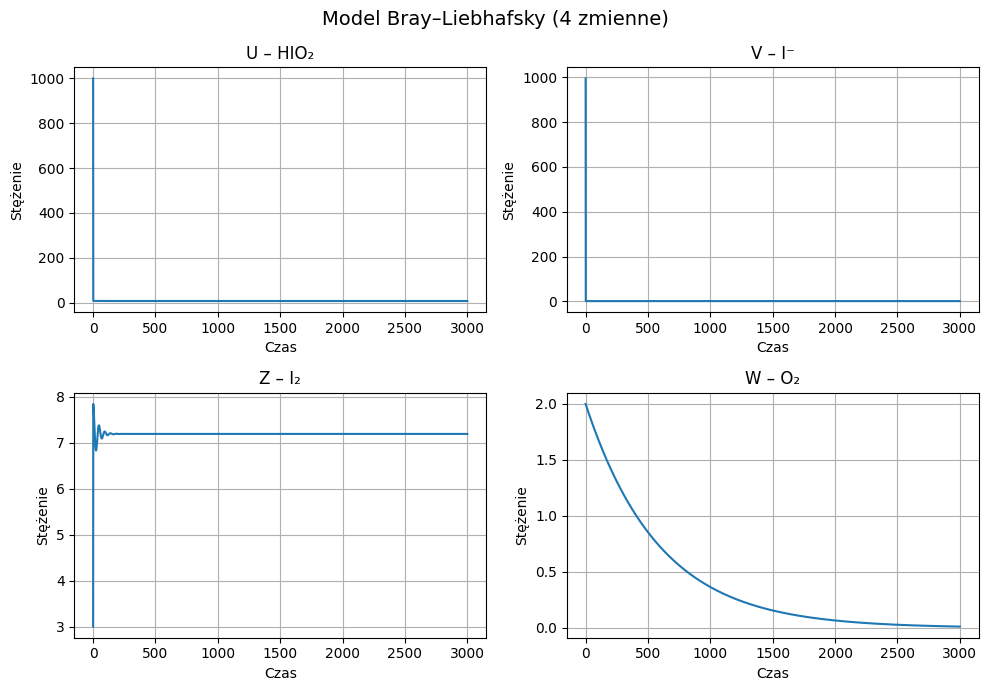

In [37]:
bl_model(U0, V0, Z0, W0, R1, R2, 1, R4, R5, R6, R7)

***
## **Redukcja do modelu dwóch zmiennych **
Łatwo widać, że zmienna $W$ występuje tylko w swoim własnym równaniu więc jest niezależna od reszty zmiennych, natomiast wg [[1](#ref1)] możemy aproksymować czymś tam zmieniamy na dwie zmienne. 

### **Porównanie metod RK4, RK45 oraz Eulera**
W tej części pokażemy jak różnią się rozwiązania równań w zależności od przyjętej metody numerycznej

***
## **4. Podsumowanie i wnioski**

Mądre matematyczne wnioski

***
## **5. Bibliografia**
<a id="ref1"></a> 
[1].  Lawrence K. Forbes, Andrew P. Bassom, Courtney Quinn, A mathematical model of the Bray–Liebhafsky reaction, data dostępu: 26.12.2025 [link](https://royalsocietypublishing.org/rspa/article/480/2290/20230964/66721/A-mathematical-model-of-the-Bray-Liebhafsky)

<a id="ref2"></a>
[2]. Płociniczak Ł. "Skrypt do równań różniczkowych", 3.2. Euler's method, data dostępu:  [link](https://www.bing.com/search?qs=HS&pq=p%c5%82o&sk=CSYN1UAS9LS6AS5&sc=25-3&q=p%C5%82ociniczak+pwr&cvid=eaac520e4e03451fb99e306b7df2d9f8&gs_lcrp=EgRlZGdlKgkIABBFGDsY-QcyCQgAEEUYOxj5BzIGCAEQRRg7MgYIAhBFGDkyBggDEC4YQDIGCAQQLhhAMgYIBRAAGEAyBggGEEUYPTIGCAcQRRg9MgYICBBFGD3SAQgxNTc0ajBqOagCCLACAQ&FORM=ANAB01&PC=DCTS&ntref=1)

<a id="ref3"></a>
[3]. data dostępu: [link](https://sundnes.github.io/solving_odes_in_python/ode_book.pdf)

<a id="ref4"></a>
[4]. Markdown for Jupyter notebooks cheatsheet, data dostępu: 31.12.2025 [link](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet) - **chyba to potem usuniemy, ale może się jeszcze przyda**

<a id="ref5"></a>
[5]. Aleksander Kufelnicki, Marian J. Surma, Chemia fizyczna : (wykłady) : skrypt dla studentów Wydziału Farmaceutycznego i Oddziału Medycyny Laboratoryjnej, data dostępu: 31.12.2025 [link](https://cybra.lodz.pl/dlibra/publication/14769/edition/11761/content)

<a id="ref6"></a>
[6]. Ewa Gudowska-Nowak, Reakcje oscylacyjne, data dostępu: 31.12.2025 [link](https://foton.if.uj.edu.pl/documents/12579485/505ff143-d76b-469e-8911-a0bfee7ddb09)

<a id="ref7"></a>
[7]. William C. Bray, A periodic reaction in homogeneous solution and its relation to catalysis, data dostępu: 3.01.2026 [link](https://pubs.acs.org/doi/abs/10.1021/ja01439a007)